In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd 
import sympy as sp
import scipy as sc
import scipy.signal as signal
from   datetime import datetime, timedelta
import statsmodels.api as sm
import os
import matplotlib as mpl
import glob
import statsmodels.api as sm
from scipy.optimize import curve_fit
from netCDF4 import Dataset
from netCDF4 import num2date
from datetime import datetime
from os.path import dirname, join as pjoin
import scipy.io as sio
from matplotlib import cm
import glob
import matplotlib.dates as mdates
from windrose import WindroseAxes
from windrose import WindAxes
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib import font_manager as fm
import cdsapi
from netCDF4 import Dataset, num2date
from pytz import timezone
import pytz
from pyproj import Proj
import mat73
plt.style.use('default')

In [2]:
path_font=r"G:\My drive\TESIS_MAESTRIA_PAULAE\Fonts\Quicksand"

prop1 = fm.FontProperties(fname=path_font+'\Quicksand-Medium.ttf')
prop2 = fm.FontProperties(fname=path_font+'\Quicksand-SemiBold.ttf')
prop1.set_size(12)

In [3]:
# Funiciones 
def roundBy(x, base=10):
    return int(base * round(float(x)/base))

def proj_ZONE17 (lon, lat):
    """
    Función para cambiar las proyecciones de las coordenadas:
    Input:
    lon, lat
    ----------------------------------------------------------
    Output:
    UTMX, UTMY
    """
    myProj = Proj("+proj=utm +zone=17 +ellps=WGS84 +datum=WGS84")
    UTMx, UTMy = myProj(lon, lat)
    return UTMx,UTMy

def coord_wgs (UTMx,UTMy):
    """
    Función para cambiar georeferenciar las proyecciones:
    Input:
    UTMX, UTMY
    ----------------------------------------------------------
    Output:
    lon, lat
    """
    myProj = Proj("+proj=utm +zone=17 +ellps=WGS84 +datum=WGS84")
    lon, lat = myProj(UTMx,UTMy, inverse = True)
    return lon, lat

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Bathymetry

Already

In [5]:
path = r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\BATIMETRIA\BAT_200m"
## Lecutra de la batimetría
#-------------------------------------
delta = 200                                           # Tamaño de la grilla 
x = np.array ([404758.9787 + i*delta for i in range(203)]) # Menor longitud, Numero de divisiones revisar archivo ASCI (output ARCGIS)
y = np.array ([1368354.4849 + i*delta for i in range (208)])        # Menor Latitud,  Numero de divisiones revisar archivo ASCI (output ARCGIS)
z = np.flipud(np.genfromtxt(path+'\idw_200m.txt',skip_header = 6))
z[z == -9999] = np.nan # Z donde es tierra

kernel = np.ones((1,1))/1.
z_smooth = signal.convolve2d(z, kernel, "same")
z_smooth = np.ma.masked_array(z, mask=np.isnan(z_smooth))
x_new = x.copy()
y_new = y.copy()
z_new = z_smooth.copy()

In [6]:
(np.max(x_new) - np.min(x_new))/3

13466.666666666666

In [7]:
##----------Lectura de la lína de costa
data_dir = pjoin(dirname(sio.__file__), r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\BATIMETRIA\Linea_COSTA_UTM") # Definir Ruta
mat_fname = pjoin(data_dir, 'linea_Costa.mat')     # Econtrar el archivo
data_mat = sio.loadmat(mat_fname)                 # Cargar el archivo
Variables = sorted(data_mat.keys())               # Variables ordenadas Alfa-numericamente 
Variables
xlc = np.array(data_mat['data'][0][0][0])
ylc = np.array(data_mat['data'][0][0][1])
lc=np.column_stack((xlc,ylc))

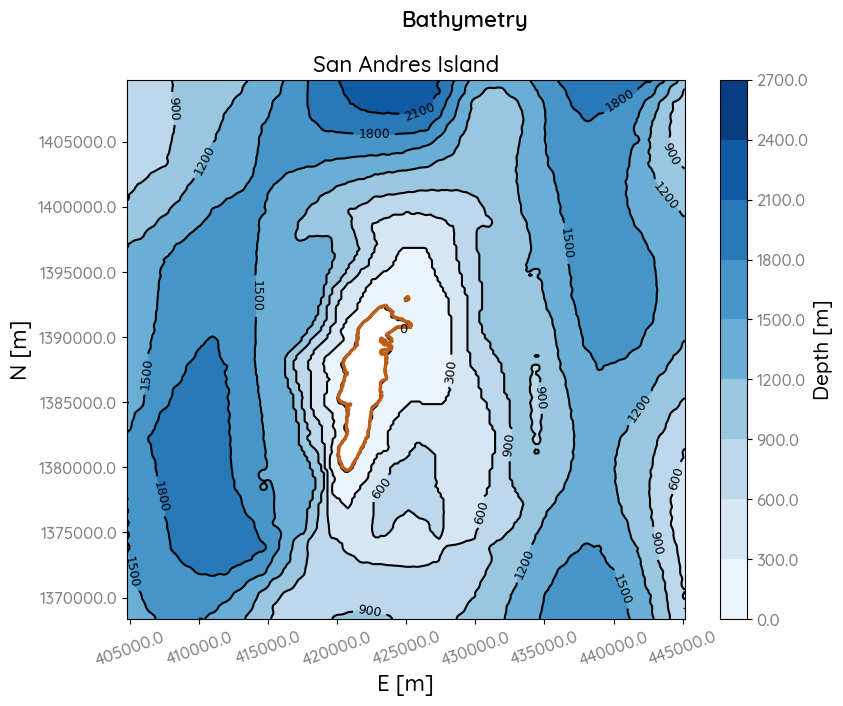

In [8]:
fig, ax = plt.subplots(figsize = (9,7))
colormap = cm.coolwarm
pc = ax.contourf(x_new, y_new, z_new,levels = np.arange(0,3000,300),cmap='Blues')
cb=plt.colorbar(pc)
# a = ax.contour(x_new, y_new, z_new,levels=list(np.arange(0,3000,300)),colors="rosybrown",\
#                linewidths=1.5)
a = ax.contour(x_new, y_new, z_new,colors="k",levels=list(np.arange(0,3000,300)),\
                linewidths=1.5)
label = plt.clabel(a, fontsize=9, inline=1, fmt = '%1.0f', colors="k")
# plt.clabel(a, fontsize=9, inline=1,fmt='%2.1f',colors='k')
ax.set_xlabel ('E [m]',size=16,fontproperties=prop1)
ax.set_ylabel ('N [m]',size=16,fontproperties=prop1)
ax.plot(lc[:,0], lc[:,1], "-k", lw=2)
ax.set_xlim([x_new.min(), x_new.max()])
ax.set_ylim([y_new.min(), y_new.max()])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cb.set_label('Depth [m]',size=15,fontproperties=prop1)
cb.set_ticklabels(cb.get_ticks(), fontproperties=prop1, color='gray',size=12)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12)
fig.suptitle("Bathymetry", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('San Andres Island',size = 16,fontproperties=prop1)   # Subtítulo de la figura
# Cunado los xticklabels son fechas:
# for label in ax.get_xticklabels():
#     label.set_fontproperties(prop_1)
#     label.set_color('gray')
#     label.set_size(12)
ax.plot(lc[:,0], lc[:,1], "-",c='chocolate', lw=2.5, alpha = 0.9)
# ax.set_title('Localización: 81.500°W - 12.670°N',size = 18)
# ax.legend(loc = 4)
# ax.set_xticks(rotation=30)
plt.xticks(rotation = 20)
plt.grid(False)

# Coordinate Z- model

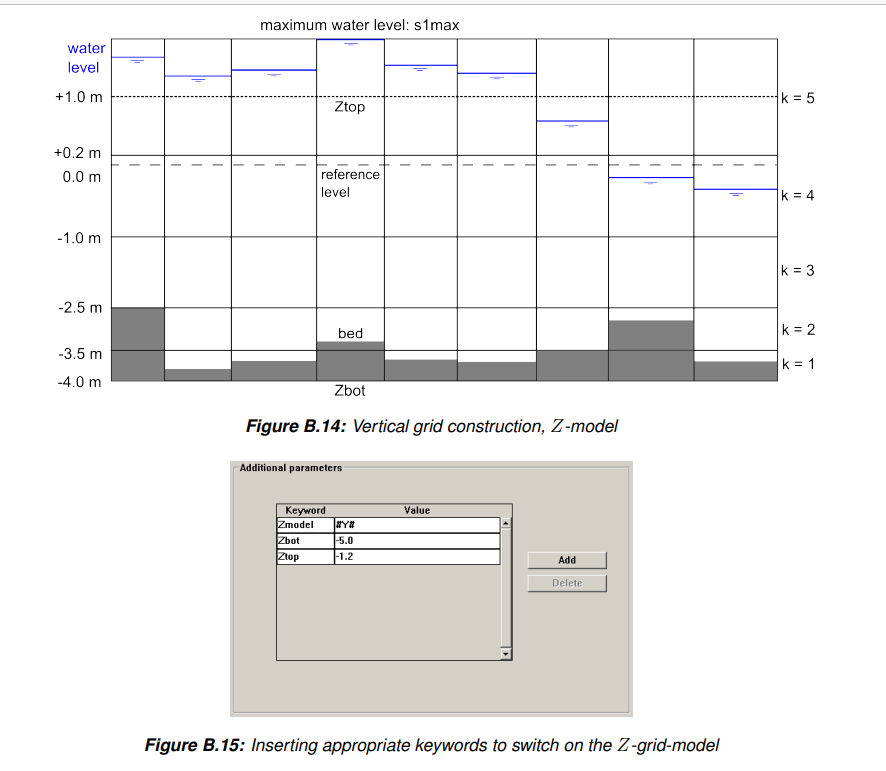

In [9]:
z_bot = -np.nanmax(z_new)
z_top = 1 #(Nivel de marea maximo)
z_bot

-2401.522

In [10]:
depth_layer = np.array([-20, -30, -40, -60, -80, -150, -300, -600, -1200, z_bot])
thickness = depth_layer*100/z_bot

# Initial conditions

Now, uniform values, before enter a map file

# Boundary conditions

## Flow velocity and water level (Riemman conditions)

In [11]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
data = Dataset(path+'\Hycom_oct21_nov15_2021_6.nc','r')
data_vel = Dataset(path+'\Hycom_oct21_nov15_2021_6_v_u.nc','r')

In [55]:
lat = np.array(data.variables['latitude'][:])
lon = np.array(data.variables['longitude'][:])
nctime = np.array(data_vel.variables['time'][:])
t_unit = data_vel.variables['time'].units
t_cal = data_vel.variables['time'].calendar
time = num2date(nctime,units=t_unit,calendar=t_cal)#Date time
time_str = np.array([time[i].strftime("%Y-%m-%d %H:%M:%S") for i in range (len(time))])
time = np.array([datetime.strptime(time_str[i], "%Y-%m-%d %H:%M:%S") for i in range (len(time))])

#------ Cambiar referencia de tiempo a utm-----------------------------------
# Cambiar la zona horaria utc 0 a utc -5
utc = pytz.utc
col_zone = timezone('America/Bogota')
time2=np.array([datetime(i.year,i.month,i.day,i.hour,i.minute,tzinfo=utc) for i in time])
loc_co =np.array([i.astimezone(col_zone) for i in time2])
time = np.array([datetime(i.year,i.month,i.day,i.hour,i.minute) for i in loc_co])

#-----------Variables-------------------------------------
depth = np.array(data_vel.variables['depth'][:]) 
ws = np.array(data.variables['surf_el'][:])
u = np.array(data_vel.variables['water_u'][:])
u[u==-30000] = np.nan
v = np.array(data_vel.variables['water_v'][:])
v[v==-30000] = np.nan

In [13]:
time

array([datetime.datetime(2021, 10, 20, 22, 0),
       datetime.datetime(2021, 10, 21, 1, 0),
       datetime.datetime(2021, 10, 21, 4, 0),
       datetime.datetime(2021, 10, 21, 7, 0),
       datetime.datetime(2021, 10, 21, 10, 0),
       datetime.datetime(2021, 10, 21, 13, 0),
       datetime.datetime(2021, 10, 21, 16, 0),
       datetime.datetime(2021, 10, 21, 19, 0),
       datetime.datetime(2021, 10, 21, 22, 0),
       datetime.datetime(2021, 10, 22, 1, 0),
       datetime.datetime(2021, 10, 22, 4, 0),
       datetime.datetime(2021, 10, 22, 7, 0),
       datetime.datetime(2021, 10, 22, 10, 0),
       datetime.datetime(2021, 10, 22, 13, 0),
       datetime.datetime(2021, 10, 22, 16, 0),
       datetime.datetime(2021, 10, 22, 19, 0),
       datetime.datetime(2021, 10, 22, 22, 0),
       datetime.datetime(2021, 10, 23, 1, 0),
       datetime.datetime(2021, 10, 23, 4, 0),
       datetime.datetime(2021, 10, 23, 7, 0),
       datetime.datetime(2021, 10, 23, 10, 0),
       datetime.dateti

In [14]:
ws.shape, u.shape, v.shape, depth.shape, lat.shape, lon.shape

((200, 25, 7), (200, 19, 25, 7), (200, 19, 25, 7), (19,), (25,), (7,))

In [15]:
z_new.shape, x_new.shape, y_new.shape

((208, 203), (203,), (208,))

In [16]:
lon_min, lat_min = coord_wgs (np.nanmin(x_new),np.nanmin(y_new))
360+lon_min, lat_min

(278.12389429615087, 12.376604643559318)

In [17]:
lon_max, lat_max = coord_wgs (np.nanmax(x_new),np.nanmax(y_new))
360+lon_max, lat_max

(278.49478255337556, 12.751914259554704)

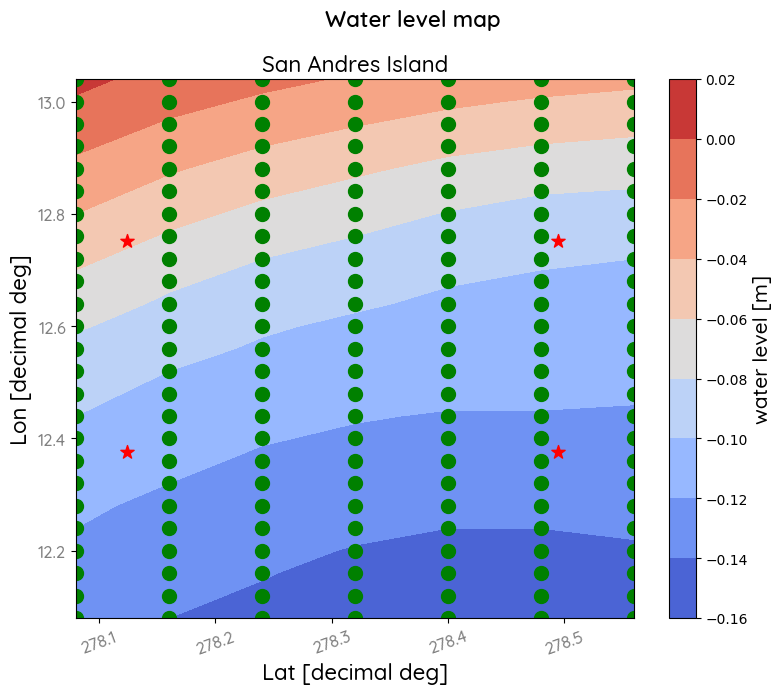

In [18]:
fig, ax = plt.subplots(figsize = (9,7))
colormap = cm.coolwarm
pc = ax.contourf(lon, lat, ws[0,:,:],cmap=colormap)
cb=plt.colorbar(pc)
# a = ax.contour(x_new, y_new, z_new,colors="k",levels=list(np.arange(0,3000,300)),\
#                 linewidths=1.5)
# label = plt.clabel(a, fontsize=9, inline=1, fmt = '%1.0f', colors="k")
# plt.clabel(a, fontsize=9, inline=1,fmt='%2.1f',colors='k')
ax.set_xlabel ('Lat [decimal deg]',size=16,fontproperties=prop1)
ax.set_ylabel ('Lon [decimal deg]',size=16,fontproperties=prop1)
# ax.plot(lc[:,0], lc[:,1], "-k", lw=2)
ax.set_xlim([lon.min(), lon.max()])
ax.set_ylim([lat.min(), lat.max()])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cb.set_label('water level [m]',size=15,fontproperties=prop1)
# cb.set_ticklabels(cb.get_ticks(), fontproperties=prop1, color='gray',size=12)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12)
fig.suptitle("Water level map", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('San Andres Island',size = 16,fontproperties=prop1)   # Subtítulo de la figura
ax.scatter(360+lon_min, lat_min, marker = "*", s=10**2, color = 'red')
ax.scatter(360+lon_max, lat_max, marker = "*", s=10**2, color = 'red')
ax.scatter(360+lon_min, lat_max, marker = "*", s=10**2, color = 'red')
ax.scatter(360+lon_max, lat_min, marker = "*", s=10**2, color = 'red')

for i in range(0, len(lat)):
    for j in range(0, len(lon)):
        ax.scatter(lon[j], lat[i], marker = 'o', s = 10**2, color = 'green')

# Cunado los xticklabels son fechas:
# for label in ax.get_xticklabels():
#     label.set_fontproperties(prop_1)
#     label.set_color('gray')
#     label.set_size(12)
# ax.plot(lc[:,0], lc[:,1], "-",c='chocolate', lw=2.5, alpha = 0.9)
# ax.set_title('Localización: 81.500°W - 12.670°N',size = 18)
# ax.legend(loc = 4)
# ax.set_xticks(rotation=30)
plt.xticks(rotation = 20)
plt.grid(False)

In [19]:
lat_max_bd = lat[-7]
lat_min_bd = lat[7]
lat_mean_bd = lat[13]
lon_max_bd = np.max(lon)
lon_min_bd = np.min(lon)
lon_mean_bd = lon[3]

For modelling the region outside the computational domain, incident waves should be known and are prescribed at the open boundaries. To reduce the reflections at the open boundaries a so-called weakly reflecting boundary condition may be applied. This boundary condition is derived using the Riemann invariants of the linearized shallow water equations without Coriolis and bottom friction (Verboom and Slob, 1984).

$f(t)=U+\zeta\sqrt{\frac{g}{d}}$

where $U$ in m/s is depth-averaged velocity in $x$ or ξ direction, $\zeta$ in m is water level above some horizontal plane of reference (datum),  $d$ an $g$ are depth below some horizontal plane of reference (datum) and acceleration due to gravity in m and m/s respectively.

In [20]:
def riemman(u, ws, depth_s, depth_bd, lat_s, lat_bd, lon_s, lon_bd):
    """
    ------------input------------------------
    u: arreglo de las velocidades 
    ws: serie de la superficie de nivel del mar
    depth_s: serie de profundidades 
    lat_bd: Cordenanda latitud 
    lon_bd: Coordenada longitud
    lat_s: serie de latitud 
    lon_s: Serie de longitud
    
    ------------output----------------------------
    ft: serie de riemman para la profundidad deseada 
    
    """
    ws = ws[:,np.where(lat_s==lat_bd)[0][0],np.where(lon_s == lon_bd)[0][0]]
    g = 9.81 
    u_mean = np.nanmean(u[:,np.where(depth_s==depth_bd)[0][0]:,\
                          np.where(lat_s==lat_bd)[0][0],np.where(lon_s == lon_bd)[0][0]], axis =1)
    if depth_bd == 0:
        depth_bd = 1
    else: 
        depth_bd = depth_bd
    ft = u_mean + ws*(np.sqrt(g/depth_bd))
    
    return ft

In [21]:
depth

array([   0.,    4.,    8.,   12.,   20.,   30.,   40.,   50.,   70.,
         90.,  125.,  200.,  300.,  400.,  600.,  800., 1000., 1500.,
       2500.])

In [22]:
np.max(z_new)

2401.522

In [23]:
depth_layer = np.array([0, 8, 20, 40, 50, 70, 90, 125,300,800])
depth_layer

array([  0,   8,  20,  40,  50,  70,  90, 125, 300, 800])

In [25]:
depth_layer*100/-z_bot

array([ 0.        ,  0.33312208,  0.8328052 ,  1.66561039,  2.08201299,
        2.91481819,  3.74762338,  5.20503248, 12.49207794, 33.31220784])

In [26]:
A = [0.8,  1.7,  3,  3.8, 5.2,  8.3 , 12.5, 25, 33.3, 6.4]
sum(A)-100

0.0

## LOS PORCENTAJES DE LOS ESPESORES DE LAS CAPAS NO SON ACUMULADOS 

Por lo tanto para obtener estos valores medidmos desde la superficie `[0, 20, 40, 70, 90, 125,200, 300, 600, 800]`, como son acumulados, se debe descumular 
ya que la capa superficial se mueve desde la superficie hacia el fondo y el espesor es la difencia entre la siguiente capa

In [27]:
(800 -600) *100/2400

8.333333333333334

In [28]:
20, 20, 30, 20, 

(20, 20, 30, 20)

In [29]:
A = [0.8, 0.8, 1.25, 0.8, 1.45, 3.1, 25, 32, 30, 4.8 ]
print(sum(A)-100)
layers_thiknes = [i*2400/100 for i in A]
print(layers_thiknes)
print(np.cumsum(np.array(layers_thiknes)))

0.0
[19.2, 19.2, 30.0, 19.2, 34.8, 74.4, 600.0, 768.0, 720.0, 115.2]
[  19.2   38.4   68.4   87.6  122.4  196.8  796.8 1564.8 2284.8 2400. ]


In [56]:
# Time split
date_ini = datetime(2021,11,2,1) # Fechas inicial de modelación
date_fin = datetime(2021,11,14,19,0) # Fechas final de modelación
ind_ini_fin = np.where((time==date_ini)|(time==date_fin))[0]
time_d3d = time[ind_ini_fin[0]:ind_ini_fin[1]]
minutes = np.array([((time_d3d[i] - time_d3d[0]).days*1440)+((time_d3d[i] - time_d3d[0]).seconds/60) for i in range (0,len(time_d3d))])

u_split = u[ind_ini_fin[0]:ind_ini_fin[1],:,:]

ws_split = ws[ind_ini_fin[0]:ind_ini_fin[1],:,:]

In [57]:
# Oeste
#------------ A ---------------------------------
dic = {}
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_mean_bd, lon,lon_min_bd)
    dic.update({j:ft})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_max_bd, lon,lon_min_bd)
    dic.update({10+j:ft})
    
df_oeste = pd.DataFrame(dic)
df_oeste.insert(loc= 0, column = 'minutes', value = minutes)

In [58]:
# df_oeste = df_oeste[1:]
df_oeste

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,-0.506942,-0.310446,-0.240945,-0.183518,-0.153991,-0.121074,-0.088698,-0.057245,-0.027467,...,-0.355679,-0.258150,-0.215229,-0.178238,-0.155171,-0.127228,-0.098511,-0.066358,-0.028898,-0.009765
1,180.0,-0.501241,-0.311303,-0.244878,-0.188228,-0.157327,-0.122325,-0.087038,-0.053684,-0.023605,...,-0.382291,-0.272759,-0.228798,-0.187804,-0.161272,-0.129474,-0.097108,-0.062486,-0.025914,-0.010540
2,360.0,-0.632475,-0.378774,-0.300656,-0.234870,-0.198722,-0.156929,-0.114933,-0.074429,-0.026572,...,-0.538567,-0.351946,-0.291945,-0.236918,-0.202213,-0.160949,-0.119555,-0.075578,-0.023967,-0.010859
3,540.0,-0.631071,-0.385845,-0.313022,-0.249289,-0.211395,-0.167056,-0.121612,-0.077309,-0.019849,...,-0.553442,-0.366375,-0.309195,-0.253318,-0.215102,-0.169699,-0.123555,-0.074245,-0.013717,-0.008859
4,720.0,-0.649239,-0.394203,-0.324974,-0.262561,-0.223719,-0.177552,-0.130021,-0.083323,-0.015934,...,-0.549803,-0.368874,-0.317545,-0.263628,-0.224105,-0.176825,-0.128323,-0.076684,-0.009355,-0.008637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,-0.111733,-0.129781,-0.113243,-0.096095,-0.087252,-0.077013,-0.068254,-0.057897,-0.026633,...,-0.018064,-0.070599,-0.065571,-0.054567,-0.045275,-0.035273,-0.027302,-0.021195,-0.003671,0.007876
98,17640.0,-0.138901,-0.144640,-0.124195,-0.101967,-0.091577,-0.080384,-0.070378,-0.059078,-0.030218,...,-0.048044,-0.085387,-0.073940,-0.057538,-0.047266,-0.036519,-0.028997,-0.022543,-0.007756,0.002211
99,17820.0,-0.113149,-0.134316,-0.118225,-0.096810,-0.086034,-0.075390,-0.064835,-0.052890,-0.027341,...,-0.026300,-0.076170,-0.066670,-0.051177,-0.041611,-0.032024,-0.025356,-0.018635,-0.007309,0.001097
100,18000.0,-0.156513,-0.144391,-0.125264,-0.103933,-0.092788,-0.081880,-0.069975,-0.055872,-0.029984,...,-0.073365,-0.086889,-0.072360,-0.056891,-0.048251,-0.039137,-0.032299,-0.023844,-0.011564,-0.001896


In [59]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'west_boundary.bct'
np.savetxt(path+'/'+name_file, df_oeste.values, delimiter=' ', fmt = "%+15.7e")

In [60]:
# Este
#------------ A ---------------------------------
dic = {}
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_max_bd, lon,lon_max_bd)
    dic.update({j:ft})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_mean_bd, lon,lon_max_bd)
    dic.update({10+j:ft})
    
df_este = pd.DataFrame(dic)
df_este.insert(loc= 0, column = 'minutes', value = minutes)

In [61]:
# df_este = df_este[1:]
df_este

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,-0.509859,-0.305848,-0.243785,-0.195035,-0.165779,-0.129943,-0.097553,-0.069224,-0.035313,...,-0.585791,-0.307980,-0.230844,-0.176590,-0.153025,-0.127976,-0.109064,-0.085595,-0.057223,-0.068731
1,180.0,-0.487685,-0.301122,-0.243259,-0.194436,-0.163736,-0.127060,-0.093412,-0.065840,-0.034467,...,-0.555294,-0.300706,-0.230379,-0.178638,-0.152896,-0.124677,-0.103762,-0.082793,-0.055415,-0.064624
2,360.0,-0.572709,-0.343351,-0.276590,-0.219968,-0.184880,-0.143851,-0.105800,-0.075146,-0.037645,...,-0.637023,-0.341668,-0.265172,-0.208624,-0.178240,-0.143135,-0.116526,-0.093528,-0.060993,-0.061560
3,540.0,-0.584165,-0.355110,-0.289890,-0.231563,-0.194137,-0.151254,-0.110720,-0.078294,-0.036664,...,-0.637230,-0.347120,-0.275848,-0.221179,-0.187855,-0.149053,-0.119615,-0.095825,-0.062431,-0.056839
4,720.0,-0.623089,-0.377128,-0.310177,-0.247212,-0.207138,-0.161653,-0.117906,-0.082827,-0.034530,...,-0.665978,-0.361805,-0.292673,-0.237009,-0.200855,-0.158784,-0.126926,-0.101357,-0.064897,-0.051114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,-0.144443,-0.132089,-0.107644,-0.085574,-0.077842,-0.069865,-0.062394,-0.054605,-0.023715,...,-0.241218,-0.195514,-0.165089,-0.140720,-0.131172,-0.121785,-0.112757,-0.103367,-0.061989,-0.038218
98,17640.0,-0.184821,-0.147059,-0.119911,-0.096507,-0.087444,-0.077995,-0.069516,-0.060670,-0.028447,...,-0.292184,-0.214314,-0.181003,-0.154543,-0.143545,-0.132523,-0.122199,-0.110838,-0.068044,-0.043711
99,17820.0,-0.159204,-0.127844,-0.108356,-0.090517,-0.082358,-0.073913,-0.066481,-0.059109,-0.030285,...,-0.254229,-0.189243,-0.165655,-0.145795,-0.136231,-0.126540,-0.117049,-0.106009,-0.068540,-0.047658
100,18000.0,-0.192685,-0.129736,-0.110877,-0.095754,-0.087588,-0.078721,-0.071093,-0.063729,-0.036759,...,-0.269285,-0.182732,-0.162367,-0.147283,-0.138746,-0.129699,-0.120760,-0.109514,-0.075110,-0.053987


In [62]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'est_boundary.bct'
np.savetxt(path+'/'+name_file, df_este.values, delimiter=' ', fmt = "%+15.7e")

In [63]:
# Norte
#------------ A ---------------------------------
dic = {}
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_max_bd, lon,lon_mean_bd)
    dic.update({j:ft})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_max_bd, lon,lon_max_bd)
    dic.update({10+j:ft})
    
df_norte = pd.DataFrame(dic)
df_norte.insert(loc= 0, column = 'minutes', value = minutes)

In [64]:
# df_norte = df_norte[1:]
df_norte

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,-0.409634,-0.259219,-0.209279,-0.165954,-0.140553,-0.111810,-0.084469,-0.057744,-0.032545,...,-0.509859,-0.305848,-0.243785,-0.195035,-0.165779,-0.129943,-0.097553,-0.069224,-0.035313,-0.038745
1,180.0,-0.405669,-0.259174,-0.211150,-0.167376,-0.141383,-0.112236,-0.084361,-0.057589,-0.034364,...,-0.487685,-0.301122,-0.243259,-0.194436,-0.163736,-0.127060,-0.093412,-0.065840,-0.034467,-0.031359
2,360.0,-0.542806,-0.329155,-0.264905,-0.207801,-0.174910,-0.138190,-0.103479,-0.070333,-0.036498,...,-0.572709,-0.343351,-0.276590,-0.219968,-0.184880,-0.143851,-0.105800,-0.075146,-0.037645,-0.023795
3,540.0,-0.581167,-0.355646,-0.287635,-0.224532,-0.186772,-0.144887,-0.104910,-0.067954,-0.029555,...,-0.584165,-0.355110,-0.289890,-0.231563,-0.194137,-0.151254,-0.110720,-0.078294,-0.036664,-0.017184
4,720.0,-0.612849,-0.372916,-0.303123,-0.236170,-0.195612,-0.150233,-0.106336,-0.066760,-0.024306,...,-0.623089,-0.377128,-0.310177,-0.247212,-0.207138,-0.161653,-0.117906,-0.082827,-0.034530,-0.013460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,-0.083143,-0.095237,-0.077665,-0.060748,-0.054652,-0.047536,-0.040499,-0.034238,-0.017426,...,-0.144443,-0.132089,-0.107644,-0.085574,-0.077842,-0.069865,-0.062394,-0.054605,-0.023715,0.006164
98,17640.0,-0.115999,-0.110141,-0.088897,-0.069122,-0.062184,-0.054605,-0.046470,-0.038384,-0.021053,...,-0.184821,-0.147059,-0.119911,-0.096507,-0.087444,-0.077995,-0.069516,-0.060670,-0.028447,0.003114
99,17820.0,-0.083095,-0.089122,-0.073909,-0.058817,-0.052981,-0.047559,-0.041267,-0.034828,-0.022968,...,-0.159204,-0.127844,-0.108356,-0.090517,-0.082358,-0.073913,-0.066481,-0.059109,-0.030285,-0.001164
100,18000.0,-0.119341,-0.091885,-0.074744,-0.060652,-0.054602,-0.049523,-0.044213,-0.038715,-0.030709,...,-0.192685,-0.129736,-0.110877,-0.095754,-0.087588,-0.078721,-0.071093,-0.063729,-0.036759,-0.006547


In [65]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'north_boundary.bct'
np.savetxt(path+'/'+name_file, df_norte.values, delimiter=' ', fmt = "%+15.7e")

In [66]:
# Sur
#------------ A ---------------------------------
dic = {}
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_min_bd, lon,lon_min_bd)
    dic.update({j:ft})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    ft = riemman(u_split, ws_split,depth, h, lat, lat_min_bd, lon,lon_mean_bd)
    dic.update({10+j:ft})
    
df_sur = pd.DataFrame(dic)
df_sur.insert(loc= 0, column = 'minutes', value = minutes)

In [67]:
# df_sur = df_sur[1:]
df_sur

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,-0.570489,-0.301203,-0.209890,-0.140961,-0.115831,-0.090427,-0.070307,-0.046323,-0.033434,...,-0.655403,-0.323210,-0.222218,-0.155608,-0.139449,-0.123407,-0.106729,-0.084287,-0.071971,-0.080057
1,180.0,-0.522870,-0.276202,-0.195537,-0.135199,-0.111398,-0.086307,-0.066952,-0.045582,-0.031487,...,-0.627750,-0.307495,-0.211917,-0.146027,-0.127900,-0.110909,-0.098837,-0.081333,-0.072997,-0.084614
2,360.0,-0.650278,-0.328996,-0.238718,-0.176008,-0.149005,-0.117907,-0.093872,-0.068954,-0.040721,...,-0.698622,-0.334715,-0.238126,-0.171603,-0.148194,-0.125518,-0.113992,-0.098451,-0.081449,-0.086493
3,540.0,-0.673994,-0.345854,-0.259270,-0.198089,-0.167999,-0.132154,-0.104478,-0.076241,-0.040194,...,-0.670169,-0.332748,-0.250256,-0.191255,-0.162210,-0.133025,-0.118932,-0.104369,-0.079210,-0.077275
4,720.0,-0.736461,-0.382535,-0.293875,-0.227827,-0.192424,-0.150146,-0.117199,-0.083883,-0.037795,...,-0.714177,-0.360679,-0.283093,-0.223708,-0.188751,-0.152018,-0.132662,-0.115337,-0.078268,-0.063382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,-0.226396,-0.191608,-0.157268,-0.130386,-0.123773,-0.115998,-0.106133,-0.089674,-0.038792,...,-0.315094,-0.242148,-0.200158,-0.167395,-0.159523,-0.150111,-0.132835,-0.107163,-0.048228,0.003564
98,17640.0,-0.265460,-0.215431,-0.178904,-0.149343,-0.140426,-0.129242,-0.116105,-0.096195,-0.041170,...,-0.345845,-0.259400,-0.217544,-0.184952,-0.176065,-0.164480,-0.144806,-0.114351,-0.046106,0.009567
99,17820.0,-0.216222,-0.198856,-0.173865,-0.151019,-0.141117,-0.128378,-0.112822,-0.090879,-0.037777,...,-0.295204,-0.233647,-0.204674,-0.181805,-0.174637,-0.163987,-0.144889,-0.114103,-0.042117,0.013785
100,18000.0,-0.263530,-0.213324,-0.189105,-0.167838,-0.155425,-0.139242,-0.120292,-0.095475,-0.043101,...,-0.314755,-0.224508,-0.199046,-0.183128,-0.177168,-0.166977,-0.149028,-0.120085,-0.051010,0.007013


In [68]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'south_boundary.bct'
np.savetxt(path+'/'+name_file, df_sur.values, delimiter=' ', fmt = "%+15.7e")

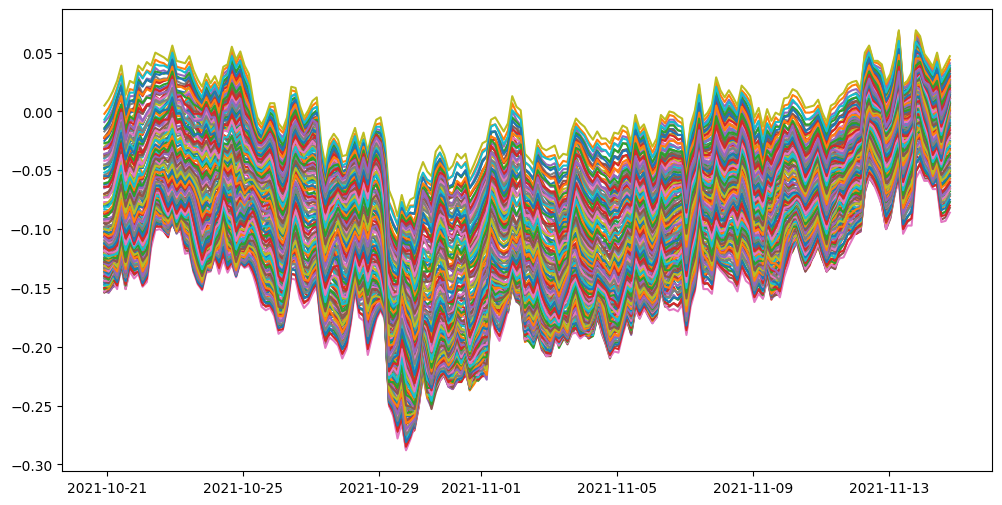

In [69]:
fig, ax = plt.subplots(figsize = (12,6))
for i in range (0, ws.shape[1]):
    for j in range (0, ws.shape[2]):
#         print(lat[i], lon[j])
        ax.plot(time, ws[:,i,j])

## Constituten properties

In [70]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
data_prop = Dataset(path+'\Hycom_oct21_nov15_2021_6_temp_sal_2.nc','r')

salt = np.array(data_prop.variables['salinity'][:])
salt[salt==-30000] = np.nan
temp = np.array(data_prop.variables['water_temp'][:])
temp[temp==-30000] = np.nan

In [71]:
print(data_prop.variables)

{'latitude': <class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    units: decimal_degrees
unlimited dimensions: 
current shape = (25,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    units: decimal_degrees
unlimited dimensions: 
current shape = (7,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'time': <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    units: hours since 2000-01-01 00:00:00
    time_origin: 2000-01-01 00:00:00
    calendar: gregorian
unlimited dimensions: 
current shape = (200,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'depth': <class 'netCDF4._netCDF4.Variable'>
float64 depth(depth)
    units: m
unlimited dimensions: 
current shape = (19,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'water_temp': <class 'netCDF4._netCDF4.Variable'>
float64 water_temp(time, depth, latitude, longitude)
    units: degC

In [72]:
def constituten(c, depth_s, depth_bd, lat_s, lat_bd, lon_s, lon_bd):
    """
    ------------input------------------------
    c: arreglo de la propiedad constitutiva (temp / sal) 
    depth_s: serie de profundidades 
    lat_bd: Cordenanda latitud 
    lon_bd: Coordenada longitud
    lat_s: serie de latitud 
    lon_s: Serie de longitud
    
    ------------output----------------------------
    constituen: serie de la propiedad constitutiva a la profundida deseada
    
    """
    c= c[:,np.where(depth_s==depth_bd)[0][0], np.where(lat_s==lat_bd)[0][0],np.where(lon_s == lon_bd)[0][0]]
    return c

In [75]:
# Time split 
salt_split = salt[ind_ini_fin[0]:ind_ini_fin[1],:,:]

temp_split = temp[ind_ini_fin[0]:ind_ini_fin[1],:,:]

In [76]:
# Oeste
#------------ A ---------------------------------
dic_sal = {}
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_mean_bd, lon,lon_min_bd)
    dic_sal.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_max_bd, lon,lon_min_bd)
    dic_sal.update({10+j:c})
    
df_sal_oeste = pd.DataFrame(dic_sal)
df_sal_oeste.insert(loc= 0, column = 'minutes', value = minutes)

In [77]:
# df_sal_oeste = df_sal_oeste[1:]
df_sal_oeste

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,35.704001,35.707001,35.739001,36.548001,36.749001,36.871001,36.866001,36.762001,35.838001,...,35.716001,35.719001,35.753001,36.391001,36.512001,36.701001,36.767001,36.745001,35.927001,34.826001
1,180.0,35.713001,35.715001,35.732001,36.526001,36.722001,36.865001,36.868001,36.764001,35.827001,...,35.716001,35.719001,35.747001,36.398001,36.518001,36.709001,36.766001,36.739001,35.902001,34.826001
2,360.0,35.722001,35.724001,35.733001,36.510001,36.701001,36.880001,36.881001,36.767001,35.781001,...,35.724001,35.726001,35.752001,36.415001,36.538001,36.735001,36.775001,36.730001,35.854001,34.838001
3,540.0,35.716001,35.719001,35.726001,36.491001,36.674001,36.877001,36.883001,36.776001,35.771001,...,35.717001,35.719001,35.749001,36.408001,36.531001,36.736001,36.775001,36.733001,35.850001,34.838001
4,720.0,35.706001,35.716001,35.723001,36.487001,36.667001,36.876001,36.884001,36.778001,35.767001,...,35.707001,35.716001,35.739001,36.388001,36.509001,36.730001,36.774001,36.746001,35.856001,34.838001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,35.769001,35.770001,35.775001,36.293001,36.430001,36.674001,36.742001,36.719001,35.802001,...,35.830001,35.830001,35.836001,36.241001,36.400001,36.630001,36.711001,36.751001,35.834001,34.796001
98,17640.0,35.731001,35.732001,35.748001,36.247001,36.397001,36.658001,36.739001,36.716001,35.791001,...,35.789001,35.789001,35.799001,36.210001,36.375001,36.622001,36.706001,36.750001,35.834001,34.795001
99,17820.0,35.738001,35.740001,35.750001,36.243001,36.399001,36.661001,36.738001,36.713001,35.790001,...,35.790001,35.792001,35.809001,36.225001,36.385001,36.623001,36.705001,36.748001,35.838001,34.795001
100,18000.0,35.740001,35.742001,35.755001,36.255001,36.419001,36.675001,36.737001,36.708001,35.790001,...,35.788001,35.792001,35.814001,36.247001,36.401001,36.631001,36.707001,36.745001,35.832001,34.795001


In [78]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'salt_west_boundary.bcc'
np.savetxt(path+'/'+name_file, df_sal_oeste.values, delimiter=' ', fmt = "%+15.7e")

In [79]:
# Oeste
#------------ A ---------------------------------
dic_temp = {}
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_mean_bd, lon,lon_min_bd)
    dic_temp.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_max_bd, lon,lon_min_bd)
    dic_temp.update({10+j:c})
    
df_temp_oeste = pd.DataFrame(dic_temp)
df_temp_oeste.insert(loc= 0, column = 'minutes', value = minutes)

In [80]:
# df_temp_oeste = df_temp_oeste[1:]
df_temp_oeste

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,29.002,29.016,29.013,27.466,26.062,24.258,22.766,20.084,14.147,...,29.039,29.050,29.024,27.305,26.478,24.884,23.377,20.817,14.590,6.235999
1,180.0,28.961,28.974,28.973,27.491,26.191,24.358,22.799,20.101,14.070,...,28.996,29.007,28.988,27.218,26.369,24.735,23.241,20.728,14.475,6.236999
2,360.0,28.992,28.994,28.954,27.442,26.206,24.275,22.593,19.861,13.588,...,29.058,29.056,28.994,27.084,26.141,24.376,22.866,20.325,14.036,6.110999
3,540.0,29.002,28.985,28.963,27.538,26.358,24.452,22.648,19.954,13.531,...,29.083,29.044,29.005,27.150,26.202,24.386,22.857,20.368,14.020,6.281999
4,720.0,29.201,29.008,28.972,27.560,26.379,24.525,22.650,19.954,13.508,...,29.212,29.081,29.021,27.320,26.399,24.584,23.001,20.535,14.056,6.282999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,29.062,28.955,28.988,27.855,27.039,25.103,23.390,21.355,14.293,...,29.108,29.076,29.078,27.874,27.192,25.296,23.571,21.445,14.485,5.829999
98,17640.0,28.920,28.809,28.856,27.924,27.134,25.122,23.410,21.381,14.231,...,28.949,28.920,28.932,27.834,27.171,25.310,23.586,21.516,14.470,5.859999
99,17820.0,28.855,28.822,28.840,27.956,27.146,25.089,23.379,21.366,14.233,...,28.948,28.912,28.915,27.767,27.106,25.294,23.559,21.532,14.493,5.814999
100,18000.0,28.992,28.867,28.850,27.912,27.048,24.966,23.299,21.320,14.242,...,28.991,28.953,28.916,27.671,27.007,25.201,23.444,21.471,14.464,5.798999


In [81]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'temp_west_boundary.bcc'
np.savetxt(path+'/'+name_file, df_temp_oeste.values, delimiter=' ', fmt = "%+15.7e")

In [82]:
# Este
#------------ A ---------------------------------
dic_sal = {}
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_max_bd, lon,lon_max_bd)
    dic_sal.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_mean_bd, lon,lon_max_bd)
    dic_sal.update({10+j:c})
    
df_sal_este = pd.DataFrame(dic_sal)
df_sal_este.insert(loc= 0, column = 'minutes', value = minutes)

In [83]:
# df_sal_este = df_sal_este[1:]
df_sal_este

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,35.687001,35.690001,35.709001,36.498001,36.675001,36.866001,36.840001,36.679001,35.645001,...,35.732001,35.733001,35.749001,36.539001,36.804001,36.933001,36.844001,36.627001,35.604001,34.806001
1,180.0,35.689001,35.692001,35.708001,36.467001,36.636001,36.858001,36.848001,36.694001,35.657001,...,35.736001,35.737001,35.746001,36.471001,36.744001,36.933001,36.856001,36.631001,35.610001,34.806001
2,360.0,35.698001,35.699001,35.709001,36.445001,36.607001,36.856001,36.867001,36.708001,35.649001,...,35.741001,35.742001,35.748001,36.426001,36.695001,36.946001,36.870001,36.635001,35.611001,34.812001
3,540.0,35.690001,35.694001,35.705001,36.428001,36.586001,36.844001,36.874001,36.719001,35.645001,...,35.736001,35.739001,35.744001,36.406001,36.665001,36.945001,36.868001,36.639001,35.616001,34.811001
4,720.0,35.680001,35.689001,35.701001,36.426001,36.586001,36.845001,36.875001,36.724001,35.643001,...,35.728001,35.735001,35.742001,36.417001,36.662001,36.944001,36.866001,36.644001,35.626001,34.811001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,35.752001,35.751001,35.755001,36.316001,36.492001,36.689001,36.709001,36.684001,35.589001,...,35.742001,35.742001,35.746001,36.333001,36.539001,36.683001,36.680001,36.657001,35.578001,34.782001
98,17640.0,35.717001,35.718001,35.724001,36.306001,36.487001,36.686001,36.705001,36.678001,35.568001,...,35.715001,35.715001,35.723001,36.332001,36.536001,36.682001,36.678001,36.642001,35.570001,34.781001
99,17820.0,35.718001,35.719001,35.721001,36.331001,36.506001,36.690001,36.704001,36.667001,35.553001,...,35.718001,35.719001,35.723001,36.340001,36.538001,36.683001,36.677001,36.623001,35.567001,34.781001
100,18000.0,35.719001,35.719001,35.721001,36.348001,36.519001,36.693001,36.703001,36.657001,35.557001,...,35.719001,35.720001,35.727001,36.330001,36.528001,36.683001,36.676001,36.622001,35.581001,34.781001


In [84]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'salt_est_boundary.bcc'
np.savetxt(path+'/'+name_file, df_sal_este.values, delimiter=' ', fmt = "%+15.7e")

In [85]:
# Este
#------------ A ---------------------------------
dic_temp = {}
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_max_bd, lon,lon_max_bd)
    dic_temp.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_mean_bd, lon,lon_max_bd)
    dic_temp.update({10+j:c})
    
df_temp_este = pd.DataFrame(dic_temp)
df_temp_este.insert(loc= 0, column = 'minutes', value = minutes)

In [86]:
# df_temp_este = df_temp_este[1:]
df_temp_este

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,28.810,28.822,28.814,27.180,25.768,23.522,21.441,19.759,13.505,...,28.913,28.926,28.907,26.640,25.411,22.885,20.883,18.897,13.157,5.964999
1,180.0,28.772,28.784,28.779,27.345,25.970,23.722,21.526,19.856,13.587,...,28.874,28.885,28.869,26.917,25.669,23.091,21.011,18.955,13.195,5.999999
2,360.0,28.907,28.907,28.863,27.477,26.112,23.833,21.503,19.750,13.436,...,28.990,28.991,28.941,27.092,25.771,23.056,20.905,18.828,13.080,6.014999
3,540.0,28.958,28.915,28.879,27.538,26.211,23.950,21.584,19.828,13.413,...,29.037,28.998,28.963,27.182,25.828,23.012,20.864,18.881,13.119,6.009999
4,720.0,29.160,28.960,28.894,27.470,26.147,23.926,21.578,19.877,13.405,...,29.264,29.047,28.977,27.135,25.742,22.899,20.822,18.943,13.186,5.985999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,29.033,28.932,28.962,27.466,26.521,24.565,23.023,21.350,13.510,...,29.075,28.968,28.994,27.192,26.183,24.186,22.722,21.268,13.308,5.887999
98,17640.0,28.893,28.783,28.822,27.398,26.442,24.485,22.931,21.274,13.374,...,28.924,28.807,28.843,27.126,26.115,24.086,22.579,21.023,13.186,5.888999
99,17820.0,28.818,28.790,28.802,27.293,26.303,24.361,22.780,21.089,13.296,...,28.841,28.810,28.819,27.114,26.108,24.057,22.483,20.792,13.161,5.889999
100,18000.0,28.954,28.837,28.805,27.218,26.206,24.275,22.670,20.950,13.317,...,28.996,28.848,28.820,27.169,26.198,24.152,22.522,20.766,13.236,5.894999


In [87]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'temp_est_boundary.bcc'
np.savetxt(path+'/'+name_file, df_temp_este.values, delimiter=' ', fmt = "%+15.7e")

In [88]:
# Norte
#------------ A ---------------------------------
dic_sal = {}
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_max_bd, lon,lon_mean_bd)
    dic_sal.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_max_bd, lon,lon_max_bd)
    dic_sal.update({10+j:c})
    
df_sal_norte = pd.DataFrame(dic_sal)
df_sal_norte.insert(loc= 0, column = 'minutes', value = minutes)

In [89]:
# df_sal_norte = df_sal_norte[1:]
df_sal_norte

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,35.691001,35.693001,35.708001,36.461001,36.648001,36.816001,36.831001,36.686001,35.837001,...,35.687001,35.690001,35.709001,36.498001,36.675001,36.866001,36.840001,36.679001,35.645001,34.826001
1,180.0,35.701001,35.703001,35.717001,36.463001,36.643001,36.809001,36.831001,36.690001,35.839001,...,35.689001,35.692001,35.708001,36.467001,36.636001,36.858001,36.848001,36.694001,35.657001,34.826001
2,360.0,35.718001,35.719001,35.731001,36.482001,36.659001,36.819001,36.841001,36.691001,35.809001,...,35.698001,35.699001,35.709001,36.445001,36.607001,36.856001,36.867001,36.708001,35.649001,34.835001
3,540.0,35.719001,35.721001,35.740001,36.493001,36.666001,36.815001,36.842001,36.691001,35.801001,...,35.690001,35.694001,35.705001,36.428001,36.586001,36.844001,36.874001,36.719001,35.645001,34.834001
4,720.0,35.716001,35.723001,35.743001,36.494001,36.660001,36.812001,36.844001,36.694001,35.794001,...,35.680001,35.689001,35.701001,36.426001,36.586001,36.845001,36.875001,36.724001,35.643001,34.834001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,35.787001,35.787001,35.792001,36.315001,36.469001,36.692001,36.742001,36.714001,35.727001,...,35.752001,35.751001,35.755001,36.316001,36.492001,36.689001,36.709001,36.684001,35.589001,34.789001
98,17640.0,35.752001,35.752001,35.767001,36.286001,36.453001,36.699001,36.740001,36.713001,35.728001,...,35.717001,35.718001,35.724001,36.306001,36.487001,36.686001,36.705001,36.678001,35.568001,34.788001
99,17820.0,35.751001,35.754001,35.775001,36.290001,36.463001,36.708001,36.739001,36.712001,35.732001,...,35.718001,35.719001,35.721001,36.331001,36.506001,36.690001,36.704001,36.667001,35.553001,34.788001
100,18000.0,35.747001,35.751001,35.776001,36.297001,36.472001,36.713001,36.738001,36.711001,35.727001,...,35.719001,35.719001,35.721001,36.348001,36.519001,36.693001,36.703001,36.657001,35.557001,34.788001


In [90]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'salt_north_boundary.bcc'
np.savetxt(path+'/'+name_file, df_sal_norte.values, delimiter=' ', fmt = "%+15.7e")

In [92]:
# Norte
#------------ A ---------------------------------
dic_temp = {}
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_max_bd, lon,lon_mean_bd)
    dic_temp.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_max_bd, lon,lon_max_bd)
    dic_temp.update({10+j:c})
    
df_temp_norte = pd.DataFrame(dic_temp)
df_temp_norte.insert(loc= 0, column = 'minutes', value = minutes)

In [93]:
# df_temp_norte = df_temp_norte[1:]
df_temp_norte 

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,28.982,28.995,28.985,27.531,26.314,24.374,22.533,19.532,14.221,...,28.810,28.822,28.814,27.180,25.768,23.522,21.441,19.759,13.505,6.128999
1,180.0,28.928,28.941,28.933,27.463,26.279,24.415,22.536,19.544,14.234,...,28.772,28.784,28.779,27.345,25.970,23.722,21.526,19.856,13.587,6.145999
2,360.0,29.014,29.006,28.959,27.287,26.079,24.255,22.342,19.312,13.953,...,28.907,28.907,28.863,27.477,26.112,23.833,21.503,19.750,13.436,6.142999
3,540.0,29.018,28.986,28.947,27.201,26.008,24.253,22.303,19.319,13.901,...,28.958,28.915,28.879,27.538,26.211,23.950,21.584,19.828,13.413,6.122999
4,720.0,29.163,29.008,28.951,27.211,26.024,24.290,22.287,19.358,13.855,...,29.160,28.960,28.894,27.470,26.147,23.926,21.578,19.877,13.405,6.135999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,29.063,28.996,29.011,27.795,26.890,24.918,23.212,21.343,14.044,...,29.033,28.932,28.962,27.466,26.521,24.565,23.023,21.350,13.510,6.008999
98,17640.0,28.914,28.846,28.880,27.792,26.859,24.784,23.094,21.357,14.026,...,28.893,28.783,28.822,27.398,26.442,24.485,22.931,21.274,13.374,6.009999
99,17820.0,28.877,28.848,28.876,27.765,26.798,24.670,22.990,21.331,14.048,...,28.818,28.790,28.802,27.293,26.303,24.361,22.780,21.089,13.296,6.011999
100,18000.0,29.013,28.892,28.882,27.732,26.740,24.602,22.928,21.298,14.024,...,28.954,28.837,28.805,27.218,26.206,24.275,22.670,20.950,13.317,6.021999


In [94]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'temp_north_boundary.bcc'
np.savetxt(path+'/'+name_file, df_temp_norte.values, delimiter=' ', fmt = "%+15.7e")

In [95]:
# Sur
#------------ A ---------------------------------
dic_sal = {}
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_min_bd, lon,lon_min_bd)
    dic_sal.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(salt_split, depth, h, lat, lat_min_bd, lon,lon_mean_bd)
    dic_sal.update({10+j:c})
    
df_sal_sur = pd.DataFrame(dic_sal)
df_sal_sur.insert(loc= 0, column = 'minutes', value = minutes)

In [96]:
# df_sal_sur = df_sal_sur[1:]
df_sal_sur

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,35.764001,35.766001,35.778001,36.625001,36.840001,36.921001,36.899001,36.702001,35.646001,...,35.754001,35.758001,35.804001,36.734001,36.898001,36.943001,36.883001,36.611001,35.533001,34.813001
1,180.0,35.766001,35.768001,35.777001,36.538001,36.795001,36.918001,36.905001,36.706001,35.639001,...,35.760001,35.762001,35.784001,36.727001,36.892001,36.946001,36.887001,36.613001,35.542001,34.813001
2,360.0,35.776001,35.776001,35.794001,36.544001,36.816001,36.935001,36.909001,36.693001,35.610001,...,35.763001,35.765001,35.777001,36.690001,36.884001,36.964001,36.902001,36.614001,35.563001,34.822001
3,540.0,35.774001,35.776001,35.800001,36.572001,36.845001,36.935001,36.903001,36.683001,35.608001,...,35.758001,35.760001,35.778001,36.622001,36.852001,36.964001,36.915001,36.621001,35.570001,34.821001
4,720.0,35.768001,35.776001,35.802001,36.597001,36.869001,36.935001,36.899001,36.673001,35.599001,...,35.746001,35.757001,35.790001,36.614001,36.849001,36.961001,36.911001,36.613001,35.560001,34.820001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,35.713001,35.714001,35.718001,36.185001,36.372001,36.668001,36.703001,36.711001,35.673001,...,35.738001,35.738001,35.741001,36.214001,36.434001,36.648001,36.661001,36.644001,35.495001,34.794001
98,17640.0,35.675001,35.678001,35.688001,36.159001,36.356001,36.661001,36.697001,36.705001,35.653001,...,35.708001,35.709001,35.715001,36.205001,36.422001,36.639001,36.652001,36.640001,35.519001,34.794001
99,17820.0,35.685001,35.685001,35.693001,36.154001,36.348001,36.649001,36.693001,36.700001,35.668001,...,35.712001,35.713001,35.715001,36.217001,36.425001,36.635001,36.647001,36.636001,35.538001,34.794001
100,18000.0,35.692001,35.689001,35.695001,36.183001,36.385001,36.666001,36.688001,36.693001,35.665001,...,35.715001,35.715001,35.718001,36.237001,36.443001,36.636001,36.641001,36.633001,35.542001,34.794001


In [97]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'salt_south_boundary.bcc'
np.savetxt(path+'/'+name_file, df_sal_sur.values, delimiter=' ', fmt = "%+15.7e")

In [98]:
# Sur
#------------ A ---------------------------------
dic_temp = {}
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_min_bd, lon,lon_min_bd)
    dic_temp.update({j:c})


#------------- B -----------------------------------
for j, h in enumerate (depth_layer):
    c = constituten(temp_split, depth, h, lat, lat_min_bd, lon,lon_mean_bd)
    dic_temp.update({10+j:c})
    
df_temp_sur = pd.DataFrame(dic_temp)
df_temp_sur.insert(loc= 0, column = 'minutes', value = minutes)

In [99]:
# df_temp_sur = df_temp_sur[1:]
df_temp_sur

,minutes,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0.0,28.974,28.987,28.977,27.098,25.687,23.732,22.248,19.085,13.250,...,29.014,29.025,29.005,26.309,24.893,22.837,20.798,18.559,12.820,5.991999
1,180.0,28.938,28.951,28.940,27.482,26.087,23.966,22.434,19.097,13.221,...,28.970,28.982,28.966,26.318,24.942,22.910,20.862,18.565,12.883,5.961999
2,360.0,28.972,28.945,28.896,27.296,25.838,23.649,22.089,18.725,12.821,...,29.028,29.027,28.978,26.454,24.991,22.940,20.872,18.368,12.716,5.955999
3,540.0,28.986,28.956,28.900,27.120,25.633,23.488,21.912,18.641,12.815,...,29.054,29.032,28.988,26.810,25.267,23.185,21.194,18.396,12.772,5.925999
4,720.0,29.145,29.008,28.911,26.980,25.435,23.316,21.698,18.566,12.770,...,29.296,29.071,28.980,26.796,25.200,23.072,21.075,18.365,12.720,5.905999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,17460.0,29.046,28.967,28.982,27.487,26.672,24.808,23.089,21.203,13.705,...,29.004,28.925,28.943,27.163,26.161,24.098,22.528,21.095,12.987,6.058999
98,17640.0,28.900,28.815,28.834,27.525,26.687,24.771,23.126,21.270,13.596,...,28.821,28.739,28.768,27.142,26.160,24.138,22.601,21.224,13.045,6.052999
99,17820.0,28.880,28.830,28.834,27.608,26.754,24.804,23.224,21.369,13.700,...,28.764,28.731,28.740,27.146,26.174,24.181,22.655,21.305,13.153,6.049999
100,18000.0,29.064,28.873,28.848,27.555,26.619,24.606,23.065,21.377,13.702,...,28.961,28.754,28.733,27.121,26.126,24.125,22.608,21.283,13.171,6.050999


In [100]:
path =  r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
name_file = 'temp_south_boundary.bcc'
np.savetxt(path+'/'+name_file, df_temp_sur.values, delimiter=' ', fmt = "%+15.7e")

# Physical parameters (Wind)

In [101]:
data = Dataset('data_wind_2021_oct_nov.nc','r')
data.variables

{'longitude': <class 'netCDF4._netCDF4.Variable'>
 float32 longitude(longitude)
     units: degrees_east
     long_name: longitude
 unlimited dimensions: 
 current shape = (3,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float32 latitude(latitude)
     units: degrees_north
     long_name: latitude
 unlimited dimensions: 
 current shape = (3,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time': <class 'netCDF4._netCDF4.Variable'>
 int32 time(time)
     units: hours since 1900-01-01 00:00:00.0
     long_name: time
     calendar: gregorian
 unlimited dimensions: 
 current shape = (1464,)
 filling on, default _FillValue of -2147483647 used,
 'u10': <class 'netCDF4._netCDF4.Variable'>
 int16 u10(time, latitude, longitude)
     scale_factor: 0.00017696378961697313
     add_offset: -4.378664596668559
     _FillValue: -32767
     missing_value: -32767
     units: m s**-1
     long_name: 10 metre U wind com

In [102]:
# Extraer variables
lat_wind = np.array(data.variables['latitude'][:])
lon_wind = np.array(data.variables['longitude'][:])
nctime_wind = np.array(data.variables['time'][:])
t_unit_wind = data.variables['time'].units
t_cal_wind = data.variables['time'].calendar
time_wind = num2date(nctime_wind,units=t_unit_wind,calendar=t_cal_wind)#Date time
u10_wind = np.array(data.variables['u10'][:])
v10_wind = np.array(data.variables['v10'][:])

# Cambiar la zona horaria utc 0 a utc -5
utc = pytz.utc
col_zone = timezone('America/Bogota')
time2=np.array([datetime(i.year,i.month,i.day,i.hour,i.minute,tzinfo=utc) for i in time_wind])
loc_co =np.array([i.astimezone(col_zone) for i in time2])
time_wind = np.array([datetime(i.year,i.month,i.day,i.hour,i.minute) for i in loc_co])
time_wind

array([datetime.datetime(2021, 9, 30, 19, 0),
       datetime.datetime(2021, 9, 30, 20, 0),
       datetime.datetime(2021, 9, 30, 21, 0), ...,
       datetime.datetime(2021, 11, 30, 16, 0),
       datetime.datetime(2021, 11, 30, 17, 0),
       datetime.datetime(2021, 11, 30, 18, 0)], dtype=object)

In [103]:
# Función para determinar 
def angulo_norte(x,y):
    if x > 0 and y > 0:
        theta = 90 - (np.arctan(abs(y/x))*(180/np.pi))
    elif x < 0 and y > 0:
        theta = 270 + (np.arctan(abs(y/x))*(180/np.pi))
    elif x < 0 and y < 0:
        theta = 270 - (np.arctan(abs(y/x))*(180/np.pi))
    else:
        theta = 90 + (np.arctan(abs(y/x))*(180/np.pi))
    return theta

In [110]:
date_ini = datetime(2021,11,2,1) # Parámetro a variar
date_fin = datetime(2021,11,14,17) # Parámetro a variar
ind_ini_fin = np.where((time_wind==date_ini)|(time_wind==date_fin))[0]
time_d3d_wind = time_wind[ind_ini_fin[0]:ind_ini_fin[1]]
print(ind_ini_fin)
print(time_d3d_wind.shape)

[ 774 1078]
(304,)


In [111]:
time_wind

array([datetime.datetime(2021, 9, 30, 19, 0),
       datetime.datetime(2021, 9, 30, 20, 0),
       datetime.datetime(2021, 9, 30, 21, 0), ...,
       datetime.datetime(2021, 11, 30, 16, 0),
       datetime.datetime(2021, 11, 30, 17, 0),
       datetime.datetime(2021, 11, 30, 18, 0)], dtype=object)

In [112]:
time_d3d_wind 

array([datetime.datetime(2021, 11, 2, 1, 0),
       datetime.datetime(2021, 11, 2, 2, 0),
       datetime.datetime(2021, 11, 2, 3, 0),
       datetime.datetime(2021, 11, 2, 4, 0),
       datetime.datetime(2021, 11, 2, 5, 0),
       datetime.datetime(2021, 11, 2, 6, 0),
       datetime.datetime(2021, 11, 2, 7, 0),
       datetime.datetime(2021, 11, 2, 8, 0),
       datetime.datetime(2021, 11, 2, 9, 0),
       datetime.datetime(2021, 11, 2, 10, 0),
       datetime.datetime(2021, 11, 2, 11, 0),
       datetime.datetime(2021, 11, 2, 12, 0),
       datetime.datetime(2021, 11, 2, 13, 0),
       datetime.datetime(2021, 11, 2, 14, 0),
       datetime.datetime(2021, 11, 2, 15, 0),
       datetime.datetime(2021, 11, 2, 16, 0),
       datetime.datetime(2021, 11, 2, 17, 0),
       datetime.datetime(2021, 11, 2, 18, 0),
       datetime.datetime(2021, 11, 2, 19, 0),
       datetime.datetime(2021, 11, 2, 20, 0),
       datetime.datetime(2021, 11, 2, 21, 0),
       datetime.datetime(2021, 11, 2, 22, 0

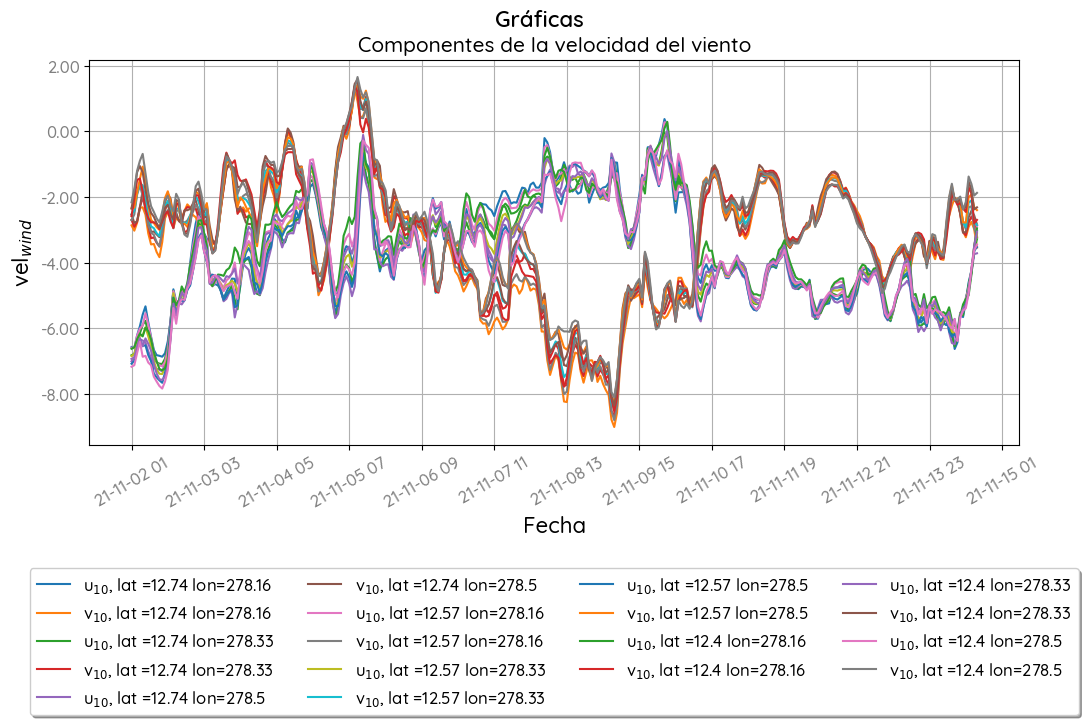

In [113]:
hourticks = ((time_d3d_wind[-1]-time_d3d_wind[0]).days*24 +(time_d3d_wind[-1]-time_d3d_wind[0]).seconds/3600+12) # Mover parámetro 12
xticks_time = np.array([time_d3d_wind[0] + timedelta(hours=h) for h in range(0,int(hourticks),int(hourticks/12))]) # Mover parámetro 12

fig, ax = plt.subplots(figsize=(12,5))
for i in range(len(lat_wind)):
    for j in range(len(lon_wind)):
        ax.plot(time_d3d_wind, u10_wind[ind_ini_fin[0]:ind_ini_fin[1],i,j], label = 'u$_{10}$, lat ='+str(lat_wind[i])+ ' lon='+str(lon_wind[j]))
        ax.plot(time_d3d_wind, v10_wind[ind_ini_fin[0]:ind_ini_fin[1],i,j], label = 'v$_{10}$, lat ='+str(lat_wind[i])+ ' lon='+str(lon_wind[j]))

# ax.plot(time_d3d, ft_west_a, label = 'f$_t$_1', ms=5, color = 'k')
# ax.plot(time_d3d, ft_south_b, label = 'f$_t$_2', ms=5)
# ax.plot(time_d3d, ft_east_b, label = 'f$_t$_3', ms=5, color = 'c')
# ax.plot(time_d3d, ft_north_a, label = 'f$_t$_4', ms=5,color = 'green')
ax.set_xticks(xticks_time)
date_format = mdates.DateFormatter('%y-%m-%d %H')
ax.xaxis.set_major_formatter(date_format)
ax.set_xlabel ('Fecha',size=16,fontproperties=prop1)
ax.set_ylabel ('vel$_{wind}$',size=16,fontproperties=prop1)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
for label in ax.get_xticklabels():
    label.set_fontproperties(prop1)
    label.set_color('gray')
    label.set_size(12)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
fig.suptitle("Gráficas", size = 16,fontproperties=prop2)     # Titulo de la figura
ax.set_title('Componentes de la velocidad del viento',size = 15,fontproperties=prop1)   # Subtítulo de la figura
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.3),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation=30)
ax.grid(True)

In [114]:
x_wind_utm = np.zeros(shape=(lon_wind.shape))
y_wind_utm = np.zeros(shape=(lat_wind.shape))
m = 0 
for i, j in zip (lon_wind,lat_wind):
    x_wind_utm[m],y_wind_utm[m]= proj_ZONE17(i,j)
    m = m + 1
    

In [116]:
# Extraer componentes de la velocidad el viento para la fecha establecida y calcular la magnitud y direeción de los vientos.
vd3d_wind = v10_wind[ind_ini_fin[0]:ind_ini_fin[1],0,0]
ud3d_wind = u10_wind[ind_ini_fin[0]:ind_ini_fin[1],0,0]
Wind_magnitud = np.sqrt(vd3d_wind**2+ud3d_wind**2)
Wind_dir = np.array([angulo_norte(ud3d_wind[i],vd3d_wind[i]) for i in range (0, len(vd3d_wind))])
minutes = np.array([((time_d3d_wind[i] - time_d3d_wind[0]).days*1440)+((time_d3d_wind[i] - time_d3d_wind[0]).seconds/60) for i in range (0,len(time_d3d_wind))])
data_wind = {'minutes':minutes,'wind_speed':Wind_magnitud,'wind_dir':Wind_dir}
df_wind = pd.DataFrame(data = data_wind)

# path = r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CALIBRACION"
path = r"G:\My drive\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS"
file_name = 'data_wind.wnd'
np.savetxt(path+'/'+file_name, df_wind.values, delimiter='  ', fmt = "%.7f" ) 

In [117]:
df_wind

,minutes,wind_speed,wind_dir
0,0.0,7.173935,246.441876
1,60.0,7.274207,245.388494
2,120.0,6.816816,245.870972
3,180.0,6.380553,248.558273
4,240.0,6.048120,247.476790
...,...,...,...
299,17940.0,6.118317,238.134747
300,18000.0,5.454701,237.665496
301,18060.0,5.063996,236.933457
302,18120.0,4.720819,230.855355


# POSPROCESAMIENTO

In [10]:
path_d3d = r"G:\Mi unidad\TESIS_MAESTRIA_PAULAE\MODELO_NUMERICO\CODIGOS\TEST7"
wl_mat = mat73.loadmat(path_d3d + '/water_level.mat')
dir_wl = wl_mat['data']
wl = dir_wl['Val']

In [22]:
wl.shape

(202, 207)

In [24]:
dir_wl['X'][1:,1:].shape

(202, 207)

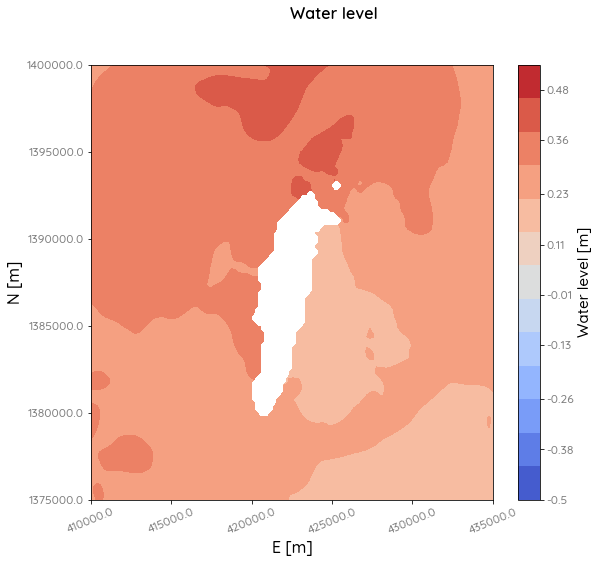

In [41]:
x = dir_wl['X'][1:,1:]
y = dir_wl['Y'][1:,1:]

fig, ax = plt.subplots(figsize = (9,8))
colormap = cm.Blues
colormap = cm.coolwarm
level_i = -0.5
level_f = 0.6
pc = ax.contourf(x, y, wl,levels = np.arange(level_i,level_f,0.08),cmap = colormap)
# pc = ax.contourf(x, y, wl,cmap = colormap)

cb=plt.colorbar(pc,ticks = [round(np.linspace(level_i,level_f,10)[i],2) for i in range(10)])
ax.set_xlabel ('E [m]',size=16,fontproperties=prop1)
ax.set_ylabel ('N [m]',size=16,fontproperties=prop1)
# ax.set_xlim([np.nanmin(x), np.nanmax(x)])
# ax.set_ylim([np.nanmin(y), np.nanmax(y)])
ax.set_xlim([410000, 435000])
ax.set_ylim([1375000, 1400000])
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cb.set_label('Water level [m]',size=15,fontproperties=prop1)
cb.set_ticklabels(cb.get_ticks(), fontproperties=prop1, color='gray',size=12)
ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12)
fig.suptitle("Water level", size = 16,fontproperties=prop2)     # Titulo de la figura
# ax.set_title('San Andres Island at'+str(time[197]),size = 16,fontproperties=prop1)
# ax.plot(lc[:,0], lc[:,1], "-",c='chocolate', lw=2.5, alpha = 0.9,label='Coast line')
# _= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
#           fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
plt.xticks(rotation =22.5)
plt.grid(False)
# plt.savefig('test_2_Prueba.jpg',dpi=800,bbox_inches='tight')